In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv(r"D:\Datasets for ML\CAR DETAILS FROM CAR DEKHO.csv")
dataset.head(5)

,Car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [3]:
dataset.isnull().sum()

Car_name         0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [4]:
dataset.dtypes

Car_name         object
year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
selling_price     int64
dtype: object

# Encoding

# Car_name

In [5]:
le = LabelEncoder()
le.fit_transform(dataset['Car_name'])

array([ 775, 1041,  505, ...,  777,  381, 1154], shape=(4340,))

In [6]:
dataset['Car_name'] = le.fit_transform(dataset['Car_name'])
dataset.head(3)

,Car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,1041,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,505,2012,100000,Diesel,Individual,Manual,First Owner,600000


# fuel

In [7]:
dataset['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [8]:
fuel_le = LabelEncoder()
dataset['fuel'] = fuel_le.fit_transform(dataset['fuel'])

In [9]:
dataset.head(3)

,Car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,2007,70000,4,Individual,Manual,First Owner,60000
1,1041,2007,50000,4,Individual,Manual,First Owner,135000
2,505,2012,100000,1,Individual,Manual,First Owner,600000


# seller_type

In [10]:
sl_le = LabelEncoder()
dataset['seller_type'] = sl_le.fit_transform(dataset['seller_type'])

# transmission

In [11]:
trm_le = LabelEncoder()
dataset['transmission'] = trm_le.fit_transform(dataset['transmission'])

# owner

In [12]:
own_le = LabelEncoder()
dataset['owner'] = own_le.fit_transform(dataset['owner'])

In [13]:
dataset.head(5)

,Car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,2007,70000,4,1,1,0,60000
1,1041,2007,50000,4,1,1,0,135000
2,505,2012,100000,1,1,1,0,600000
3,118,2017,46000,4,1,1,0,250000
4,279,2014,141000,1,1,1,2,450000


# OutLiers (checking for outliers)
Now we'll consider outliers because our dataset has it's outlier nature, 

that means ther are different car models in our dataset and these models can have drastically increase prices

In [14]:
input_data = dataset.iloc[:,:-1]
output_data = dataset['selling_price']

# Scailing

In [15]:
ss = StandardScaler()
ss.fit_transform(input_data)

array([[ 0.05852176, -1.44507431,  0.08113906, ...,  0.44819164,
         0.33927557, -0.66507931],
       [ 0.72352031, -1.44507431, -0.3476891 , ...,  0.44819164,
         0.33927557, -0.66507931],
       [-0.61647677, -0.2587948 ,  0.7243813 , ...,  0.44819164,
         0.33927557, -0.66507931],
       ...,
       [ 0.06352175, -0.97056251,  0.35987736, ...,  0.44819164,
         0.33927557,  0.95651856],
       [-0.92647609,  0.69022881,  0.50996722, ...,  0.44819164,
         0.33927557, -0.66507931],
       [ 1.0060197 ,  0.69022881, -0.56210318, ...,  0.44819164,
         0.33927557, -0.66507931]], shape=(4340, 7))

In [16]:
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [17]:
input_data.head(5)

,Car_name,year,km_driven,fuel,seller_type,transmission,owner
0,0.058522,-1.445074,0.081139,1.014993,0.448192,0.339276,-0.665079
1,0.723520,-1.445074,-0.347689,1.014993,0.448192,0.339276,-0.665079
2,-0.616477,-0.258795,0.724381,-0.974051,0.448192,0.339276,-0.665079
3,-1.583975,0.927485,-0.433455,1.014993,0.448192,0.339276,-0.665079
4,-1.181476,0.215717,1.603479,-0.974051,0.448192,0.339276,0.956519


# Train_Test_Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# To check whether our dataset has linear relation or not

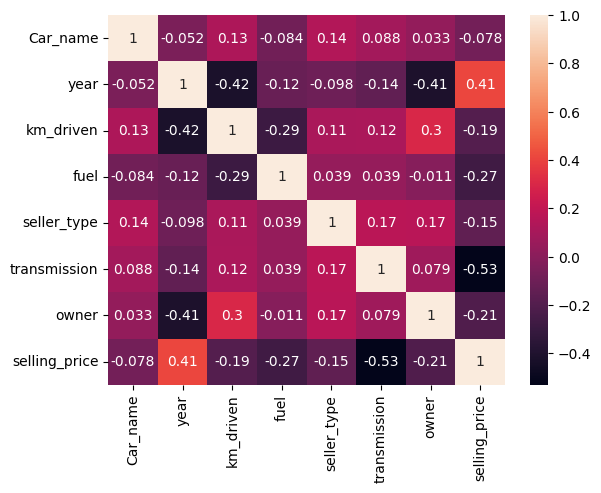

In [20]:
sns.heatmap(data = dataset.corr(), annot = True)
plt.show()

# meanwhile, our dataset has no linear relation

# Model Building

In [21]:
# These are all the possible ways for the Supervised Regression Analysis

# In fact dataset has no linear relation (has no better accuracy), but we'll apply linear relation 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Now Apply all the Algorithms one by one to check which one  has the best Accuracy

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(46.14525821999425, 39.59697625888199)

In [23]:
la = Lasso(alpha=0.5)
la.fit(x_train, y_train)
la.score(x_train,y_train)*100, la.score(x_test,y_test)*100

(46.14525821964441, 39.596991818127556)

In [24]:
ri = Ridge(alpha=0.7)
ri.fit(x_train, y_train)
ri.score(x_train,y_train)*100, ri.score(x_test,y_test)*100

(46.14525692611029, 39.598784769805675)

In [25]:
en = ElasticNet(alpha=0.5)
en.fit(x_train, y_train)
en.score(x_train,y_train)*100, en.score(x_test,y_test)*100

(44.83979189053514, 39.98177324987312)

In [26]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

(97.03001408702806, 69.75404832350611)

In [27]:
sv = SVR()
sv.fit(x_train, y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(-7.23532214326299, -6.337223599026687)

In [28]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_train,y_train)*100, knn.score(x_test,y_test)*100

(85.8371182910593, 47.47133152486369)

In [29]:
dt = DecisionTreeRegressor(max_depth=18)
dt.fit(x_train, y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(99.87947352047763, 54.38869901384968)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
mean_squared_error(y_test,dt.predict(x_test)), mean_absolute_error(y_test,dt.predict(x_test))

(139192137706.32205, 122802.38629103593)

In [32]:
mean_squared_error(y_test,rf.predict(x_test)), mean_absolute_error(y_test,rf.predict(x_test))

(92301657260.15242, 107912.07095803159)

# Testing

In [33]:
x_test

,Car_name,year,km_driven,fuel,seller_type,transmission,owner
3978,1.278519,-0.733307,0.295553,-0.974051,0.448192,0.339276,-0.665079
1448,1.008520,1.401997,-0.840841,1.014993,0.448192,0.339276,-0.665079
2664,-0.693977,-1.207818,-0.525160,1.014993,0.448192,0.339276,0.956519
17,-1.181476,0.215717,1.603479,-0.974051,0.448192,0.339276,0.956519
1634,-0.076478,0.690229,-0.133275,-0.974051,0.448192,-2.947457,0.956519
...,...,...,...,...,...,...,...
3468,0.723520,-1.445074,-0.133275,1.014993,0.448192,0.339276,2.578116
3164,0.226021,0.452973,1.153209,-0.974051,0.448192,0.339276,-0.665079
416,0.441021,-0.496051,-0.562103,-0.974051,0.448192,0.339276,0.956519
1616,1.556018,0.927485,-1.280819,1.014993,2.628855,0.339276,-0.665079


In [34]:
rf.predict([[0.058522,-1.445074,0.081139,1.014993,0.448192,0.339276,-0.665079]])

C:\Users\hasna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([60500.])

In [35]:
y_test

3978    165000
1448    250000
2664    120000
17      450000
1634    730000
         ...  
3468    130000
3164    350000
416     150000
1616    650000
2480    575000
Name: selling_price, Length: 868, dtype: int64

In [46]:
new_data = pd.DataFrame([['Maruti_800_AC',2007,70000,'Petrol','Individual','Manual','First_Owner']],columns=x_train.columns)
new_data

,Car_name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti_800_AC,2007,70000,Petrol,Individual,Manual,First_Owner
